In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

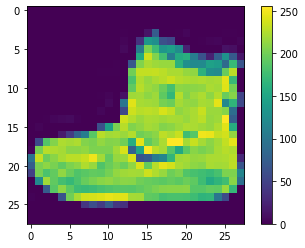

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255
test_images = test_images / 255

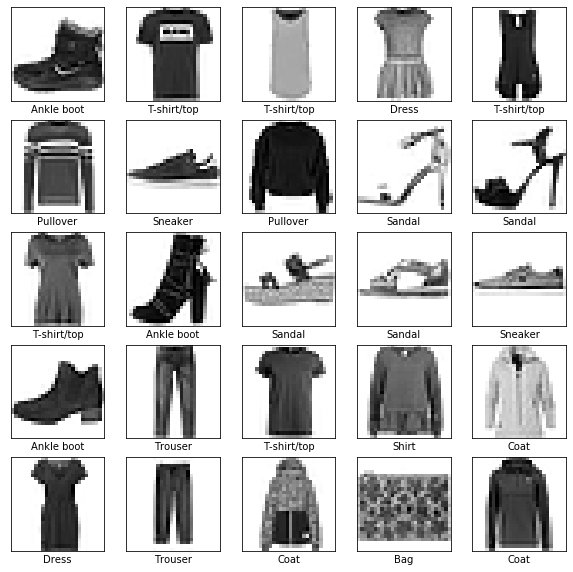

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    pass
plt.show()

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [25]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/sample - loss: 1.0896 - accuracy: 0.6610
Epoch 2/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.6461 - accuracy: 0.7662
Epoch 3/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.5709 - accuracy: 0.7936
Epoch 4/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.5279 - accuracy: 0.8117
Epoch 5/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4992 - accuracy: 0.8240
Epoch 6/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.4784 - accuracy: 0.8311
Epoch 7/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4626 - accuracy: 0.8378
Epoch 8/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4509 - accuracy: 0.8405
Epoch 9/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4401 - accuracy: 0.8449
Epoch

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest Accuracy:', test_acc)

10000/10000 - 1s - loss: 0.4612 - accuracy: 0.8348

Test Accuracy: 0.8348


In [28]:
predictions = model.predict(test_images)

In [33]:
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [34]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

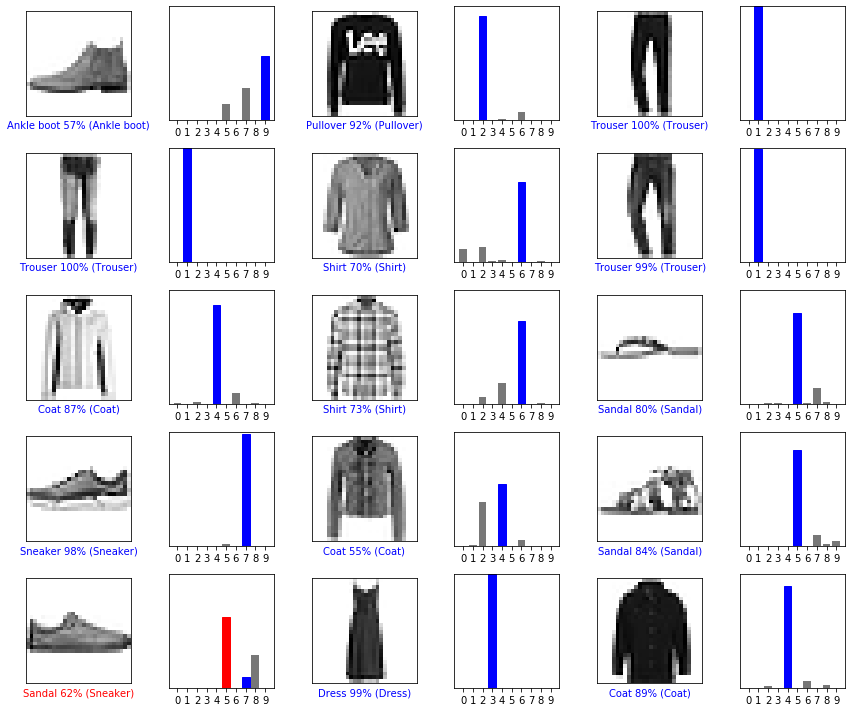

In [35]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()